In [15]:
# IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Abrindo CSV
try:
    df = pd.read_csv('C:/Users/dsadm/Desktop/Inteligencia_Artificial_e_Big-Data_2_semestre_ADS/Formativa/dados_produtos.csv', sep=',')
    print("✓ Dados importados com sucesso!")
    print(f"✓ Total de registros: {len(df)}")
    print()
except FileNotFoundError:
    print("ERRO: Arquivo não encontrado. Certifique-se de que o arquivo está no diretório correto.")
    print("Criando dados de exemplo para demonstração...")

✓ Dados importados com sucesso!
✓ Total de registros: 100



In [17]:
# Visualizando as primeiras linhas
print("Primeiras 5 linhas do conjunto de dados:")
print(df.head())
print()

Primeiras 5 linhas do conjunto de dados:
  product_name  rating  rating_count  purchased
0    Televisão    3.04            29          1
1      Celular    3.46          3872          0
2    Cafeteira    3.25          1187          0
3    Televisão    3.77          4097          1
4    Videogame    5.00          4738          1



In [18]:
# Informações gerais do dataset
print("\n2.1 - Informações Gerais do Dataset (df.info()):")
print("-" * 80)
print(df.info())
print()


2.1 - Informações Gerais do Dataset (df.info()):
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None



In [19]:
# Estatísticas descritivas
print("\n2.2 - Estatísticas Descritivas (df.describe()):")
print("-" * 80)
print(df.describe())
print()


2.2 - Estatísticas Descritivas (df.describe()):
--------------------------------------------------------------------------------
           rating  rating_count  purchased
count  100.000000    100.000000     100.00
mean     4.056900   2536.670000       0.55
std      0.588344   1458.312544       0.50
min      3.020000     10.000000       0.00
25%      3.580000   1433.250000       0.00
50%      4.105000   2424.000000       1.00
75%      4.505000   3773.000000       1.00
max      5.000000   4977.000000       1.00



In [20]:
# Verificando valores únicos
print("\n2.3 - Produtos Disponíveis:")
print("-" * 80)
print(df['product_name'].value_counts())
print()


2.3 - Produtos Disponíveis:
--------------------------------------------------------------------------------
product_name
Celular      21
Televisão    19
iPod         18
Videogame    17
Notebook     16
Cafeteira     9
Name: count, dtype: int64



In [21]:
# Distribuição de compras
print("\n2.4 - Distribuição de Compras:")
print("-" * 80)
print(f"Comprou (1): {df['purchased'].sum()} ({df['purchased'].sum()/len(df)*100:.2f}%)")
print(f"Não comprou (0): {(df['purchased']==0).sum()} ({(df['purchased']==0).sum()/len(df)*100:.2f}%)")
print()


2.4 - Distribuição de Compras:
--------------------------------------------------------------------------------
Comprou (1): 55 (55.00%)
Não comprou (0): 45 (45.00%)



Text(0.5, 0.98, 'ANÁLISE EXPLORATÓRIA DE DADOS')

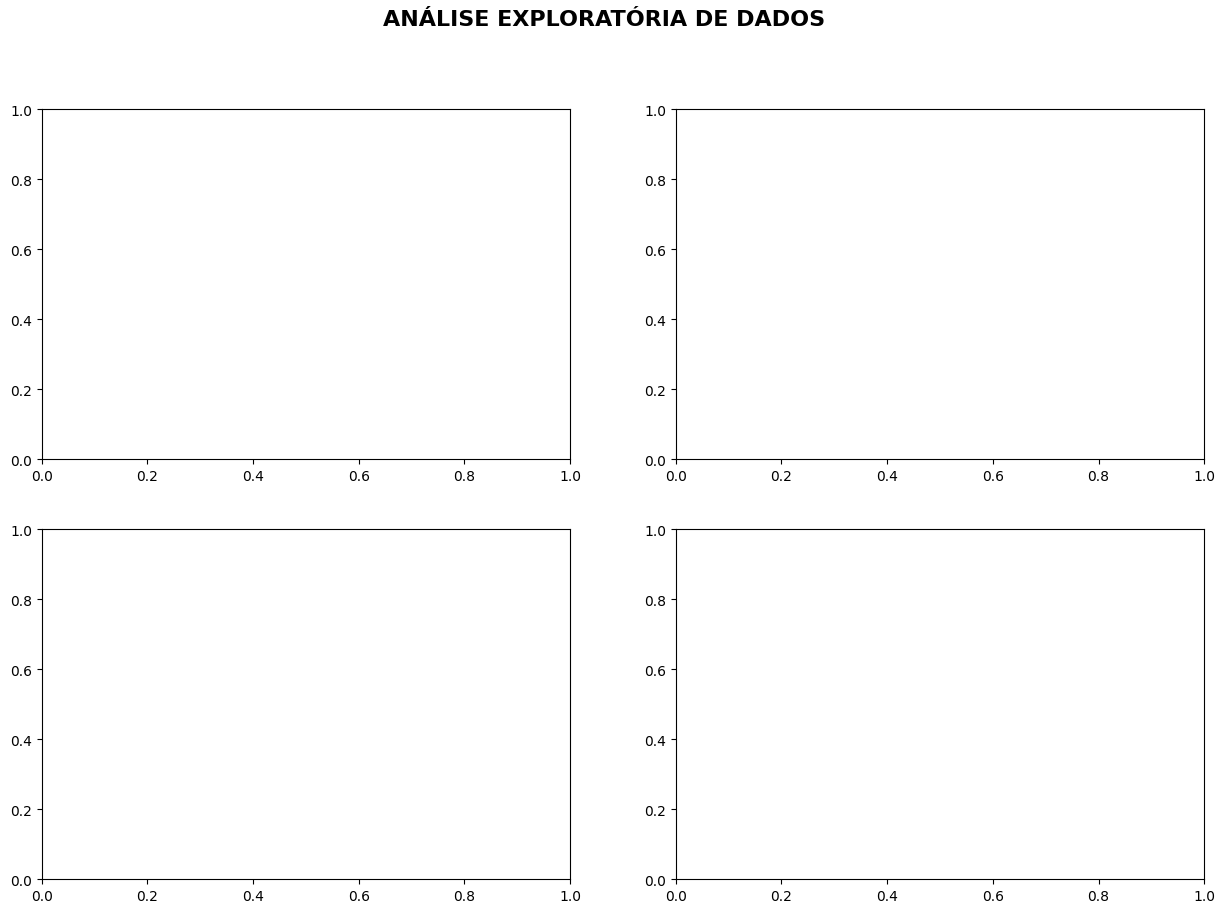

In [22]:
# Gráficos de exploração
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('ANÁLISE EXPLORATÓRIA DE DADOS', fontsize=16, fontweight='bold')

In [23]:
# Gráfico 1: Distribuição de Ratings
axes[0, 0].hist(df['rating'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribuição das Notas de Avaliação')
axes[0, 0].set_xlabel('Nota (Rating)')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].grid(True, alpha=0.3)

In [24]:
# Gráfico 2: Box Plot das notas (verificar outliers)
axes[0, 1].boxplot([df[df['product_name']==p]['rating'].values for p in df['product_name'].unique()],
                    labels=df['product_name'].unique())
axes[0, 1].set_title('Box Plot - Notas por Produto (Detecção de Outliers)')
axes[0, 1].set_xlabel('Produto')
axes[0, 1].set_ylabel('Nota')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

In [25]:
# Gráfico 3: Distribuição de Compras
compras = df['purchased'].value_counts()
axes[1, 0].bar(['Não Comprou', 'Comprou'], compras.values, color=['salmon', 'lightgreen'], edgecolor='black')
axes[1, 0].set_title('Distribuição de Compras')
axes[1, 0].set_ylabel('Quantidade')
axes[1, 0].grid(True, alpha=0.3)

In [26]:
# Gráfico 4: Relação entre Rating e Compra
axes[1, 1].scatter(df[df['purchased']==0]['rating'], 
                   df[df['purchased']==0]['rating_count'], 
                   alpha=0.5, label='Não Comprou', color='red')
axes[1, 1].scatter(df[df['purchased']==1]['rating'], 
                   df[df['purchased']==1]['rating_count'], 
                   alpha=0.5, label='Comprou', color='green')
axes[1, 1].set_title('Relação entre Rating, Rating Count e Compra')
axes[1, 1].set_xlabel('Nota (Rating)')
axes[1, 1].set_ylabel('Quantidade de Avaliações')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
print("✓ Gráficos de exploração salvos como 'exploracao_dados.png'")
print()

✓ Gráficos de exploração salvos como 'exploracao_dados.png'



<Figure size 640x480 with 0 Axes>

In [27]:
# Verificando valores ausentes
print("\n3.1 - Verificando Valores Ausentes:")
print("-" * 80)
valores_ausentes = df.isnull().sum()
print(valores_ausentes)

if valores_ausentes.sum() > 0:
    print("\nValores ausentes encontrados. Realizando tratamento...")
    # Preenchendo valores ausentes numéricos com a mediana
    df['rating'].fillna(df['rating'].median(), inplace=True)
    df['rating_count'].fillna(df['rating_count'].median(), inplace=True)
    print("Valores ausentes tratados!")
else:
    print("Não há valores ausentes no dataset!")
print()


3.1 - Verificando Valores Ausentes:
--------------------------------------------------------------------------------
product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64
Não há valores ausentes no dataset!



In [28]:
# Dicionário para armazenar os modelos e resultados
modelos = {}
resultados = {}

In [29]:
# Lista de produtos únicos
produtos = df['product_name'].unique()
print(f"\nTotal de produtos para análise: {len(produtos)}")
print("Produtos:", list(produtos))
print()


Total de produtos para análise: 6
Produtos: ['Televisão', 'Celular', 'Cafeteira', 'Videogame', 'iPod', 'Notebook']



In [30]:
# Loop para criar um modelo para cada produto
for produto in produtos:
    print("\n" + "=" * 80)
    print(f"PRODUTO: {produto.upper()}")
    print("=" * 80)


PRODUTO: TELEVISÃO

PRODUTO: CELULAR

PRODUTO: CAFETEIRA

PRODUTO: VIDEOGAME

PRODUTO: IPOD

PRODUTO: NOTEBOOK


In [31]:
# Filtrar dados apenas do produto atual
df_produto = df[df['product_name'] == produto].copy()
print(f"Total de registros para {produto}: {len(df_produto)}")

Total de registros para Notebook: 16


In [32]:
# Verificar se há dados suficientes
if len(df_produto) < 10:
    print(f"Dados insuficientes para {produto}. Pulando...")
continue
    

SyntaxError: 'continue' not properly in loop (144141423.py, line 4)

In [ ]:
# ETAPA 4: Divisão em treinamento e teste
print(f"\nETAPA 4: Divisão dos Dados ({produto})")
    print("-" * 80)